<a href="https://colab.research.google.com/github/avtar123/Forecasting-Mini-Course-Sales/blob/main/Forecasting_Mini_Course_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import copy

In [2]:
train= pd.read_csv('/content/drive/MyDrive/Forecasting_Mini_Course_Sales/train.csv')
test= pd.read_csv('/content/drive/MyDrive/Forecasting_Mini_Course_Sales/test.csv')

In [3]:
train.head(25)

,id,date,country,store,product,num_sold
0,0,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Improve Your Coding,63
1,1,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Train More LLMs,66
2,2,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Win Friends and Influence People,9
3,3,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Win More Kaggle Competitions,59
4,4,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Write Better,49
5,5,2017-01-01,Argentina,Kaggle Store,Using LLMs to Improve Your Coding,88
6,6,2017-01-01,Argentina,Kaggle Store,Using LLMs to Train More LLMs,98
7,7,2017-01-01,Argentina,Kaggle Store,Using LLMs to Win Friends and Influence People,14
8,8,2017-01-01,Argentina,Kaggle Store,Using LLMs to Win More Kaggle Competitions,83
9,9,2017-01-01,Argentina,Kaggle Store,Using LLMs to Write Better,69


In [4]:
train.describe()

,id,num_sold
count,136950.00000,136950.000000
mean,68474.50000,165.522636
std,39534.20402,183.691575
min,0.00000,2.000000
25%,34237.25000,46.000000
50%,68474.50000,98.000000
75%,102711.75000,184.000000
max,136949.00000,1380.000000


In [5]:
test.describe()

,id
count,27375.000000
mean,150637.000000
std,7902.626146
min,136950.000000
25%,143793.500000
50%,150637.000000
75%,157480.500000
max,164324.000000


In [6]:
pd.isnull(train).sum()

id          0
date        0
country     0
store       0
product     0
num_sold    0
dtype: int64

<ipython-input-7-0e17965868d0>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap=sns.heatmap(train.corr(),center=0, cmap='BrBG', annot=True)


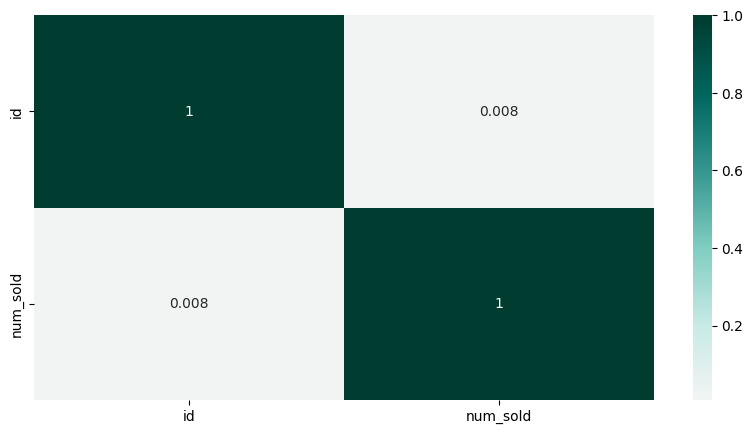

In [7]:
fig,ax=plt.subplots(figsize=(10,5))
heatmap=sns.heatmap(train.corr(),center=0, cmap='BrBG', annot=True)

In [8]:
train_d=copy.deepcopy(train)
test_d=copy.deepcopy(test)

In [9]:
li=['id','date']

In [10]:
train_d.drop(li,axis=1,inplace=True)
test_d.drop(li,axis=1,inplace=True)

In [11]:
train_d.columns

Index(['country', 'store', 'product', 'num_sold'], dtype='object')

In [12]:
train_d.columns[-1]

'num_sold'

country
store
product
num_sold


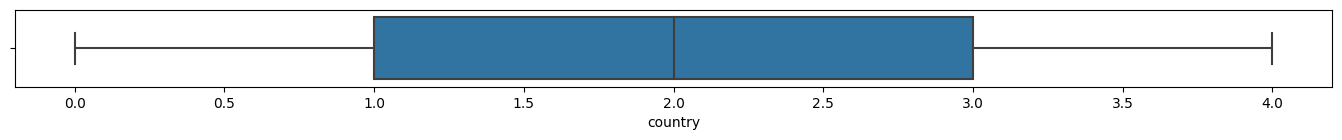

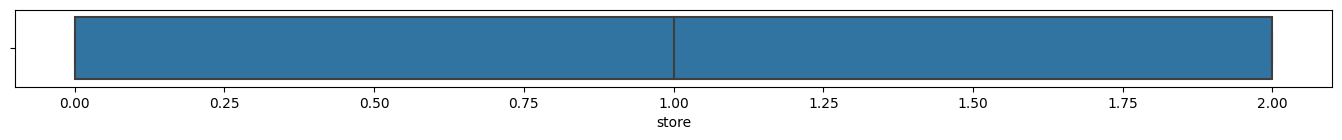

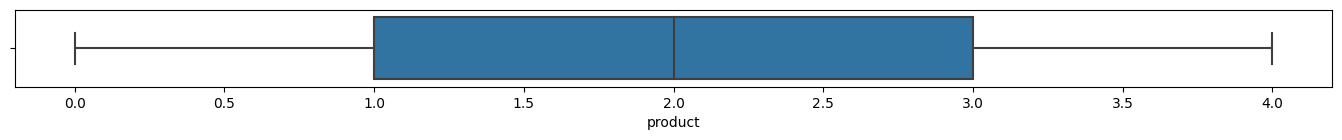

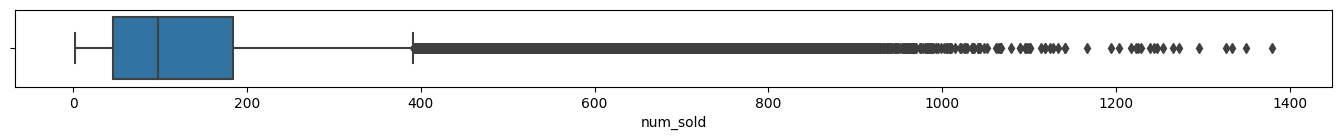

In [ ]:
import seaborn as sns
for i in train_d.columns:
  #sns.boxplot(train[i])
  print(i)
  plt.figure(figsize=(17,1))
  sns.boxplot(data=train_d, x=i)

In [ ]:
# Importing
import sklearn
from sklearn.datasets import load_diabetes
import pandas as pd

''' Detection '''
# IQR
# Calculate the upper and lower limits
#for i in li2:
i= 'num_sold'
Q1 = train_d[i].quantile(0.25)
Q3 = train_d[i].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(train_d[i]>=upper)[0]
lower_array = np.where(train_d[i]<=lower)[0]
# print(upper_array,lower_array,lower,upper,i)
# for i in upper_array:
#   print(train['SalePrice'].iloc[i])


# Removing the outliers
# for j in upper_array:
train_d.drop(train_d.index[upper_array],inplace=True)
train_d.drop(train_d.index[lower_array],inplace=True)

In [13]:
from sklearn import preprocessing

string_object=[]
for idx,i in enumerate(train_d.dtypes):
  if i == 'object':
    string_object.append(train_d.columns[idx])

# label_encoder object knows
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
for str_obj in string_object:
  print(str_obj)
  train_d[str_obj]= label_encoder.fit_transform(train_d[str_obj])

country
store
product


In [14]:
from sklearn import preprocessing

string_object1=[]
for idx,i in enumerate(test_d.dtypes):
  if i == 'object':
    string_object1.append(test_d.columns[idx])

# label_encoder object knows
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
for str_obj1 in string_object1:
  print(str_obj1)
  test_d[str_obj1]= label_encoder.fit_transform(test_d[str_obj1])

country
store
product


In [15]:
train_d.head(25)

,country,store,product,num_sold
0,0,1,0,63
1,0,1,1,66
2,0,1,2,9
3,0,1,3,59
4,0,1,4,49
5,0,2,0,88
6,0,2,1,98
7,0,2,2,14
8,0,2,3,83
9,0,2,4,69


In [16]:
train_d.num_sold

0          63
1          66
2           9
3          59
4          49
         ... 
136945    700
136946    752
136947    111
136948    641
136949    539
Name: num_sold, Length: 136950, dtype: int64

In [ ]:
test_d

,country,store,product
0,0,1,0
1,0,1,1
2,0,1,2
3,0,1,3
4,0,1,4
...,...,...,...
27370,4,0,0
27371,4,0,1
27372,4,0,2
27373,4,0,3


In [17]:
# Find unique IDs
unique_ids = train_d['product'].unique()
count=0
# Print the unique IDs
for id in unique_ids:
    count=count+1
print(count)

5


In [18]:
X=train_d.iloc[:,:-1]
X

,country,store,product
0,0,1,0
1,0,1,1
2,0,1,2
3,0,1,3
4,0,1,4
...,...,...,...
136945,4,0,0
136946,4,0,1
136947,4,0,2
136948,4,0,3


In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
y=train_d.iloc[:,-1:]
y

,num_sold
0,63
1,66
2,9
3,59
4,49
...,...
136945,700
136946,752
136947,111
136948,641


In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.2, random_state=10 )

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
linear=LinearRegression()
linear.fit(X_train,y_train)

LinearRegression()

In [ ]:
linear.score(X_test,y_test)

0.32843537021038505

In [ ]:
linear.score(X_train,y_train)

0.3373831547157776

In [ ]:
y_test_linear=linear.predict(test_d)
y_test_linear

array([[161.90953671],
       [147.68977178],
       [133.47000685],
       ...,
       [322.962983  ],
       [308.74321807],
       [294.52345314]])

In [ ]:
np.array(test.iloc[:,:].values)

array([[136950, '2022-01-01', 'Argentina', 'Kaggle Learn',
        'Using LLMs to Improve Your Coding'],
       [136951, '2022-01-01', 'Argentina', 'Kaggle Learn',
        'Using LLMs to Train More LLMs'],
       [136952, '2022-01-01', 'Argentina', 'Kaggle Learn',
        'Using LLMs to Win Friends and Influence People'],
       ...,
       [164322, '2022-12-31', 'Spain', 'Kagglazon',
        'Using LLMs to Win Friends and Influence People'],
       [164323, '2022-12-31', 'Spain', 'Kagglazon',
        'Using LLMs to Win More Kaggle Competitions'],
       [164324, '2022-12-31', 'Spain', 'Kagglazon',
        'Using LLMs to Write Better']], dtype=object)

In [ ]:
data_save = pd.DataFrame({"id":test['id'],"num_sold":np.ravel(y_test_linear)})
data_save.to_csv("Mini_Course_Salesli.csv",index=False)

In [ ]:
# Import the necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest regressor object
rf_regressor = RandomForestRegressor(max_depth=10,n_estimators=1000)

# Train the Random Forest model
rf_regressor.fit(X_train, y_train)

<ipython-input-64-e83a8787cc04>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_regressor.fit(X_train, y_train)


RandomForestRegressor(max_depth=10, n_estimators=1000)

In [ ]:
rf_regressor.score(X_test,y_test)

0.9476033434170801

In [ ]:
rf_regressor.score(X_train,y_train)

0.9483496545311997

In [ ]:
y_test_reg=rf_regressor.predict(test_d)
y_test_reg

array([ 29.95126564,  29.51943478,   4.22534708, ...,  68.29533478,
       370.30505274, 336.69950992])

In [ ]:
data_save = pd.DataFrame({"id":test['id'],"num_sold":np.ravel(y_test_reg)})
data_save.to_csv("Mini_Course_Salesreg1.csv",index=False)

In [ ]:
# Make predictions on the test set
y_pred = rf_regressor.predict(X_test)

# Calculate RMSE (Root Mean Squared Error) to evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))


In [ ]:
rmse

41.95902918887263

# **XGBoost**

In [23]:
from xgboost import XGBRegressor

In [24]:
xgb = XGBRegressor(n_estimators=10000, max_depth = 10)


In [25]:
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=10000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [26]:
xgb.score(X_test,y_test)

0.9476015747292301

In [27]:
xgb.score(X_train,y_train)

0.9483496977063847

In [28]:
y_test_xg=xgb.predict(test_d)
y_test_xg

array([ 29.96116  ,  29.521856 ,   4.2239714, ...,  68.29018  ,
       370.33212  , 336.71576  ], dtype=float32)

In [29]:
data_save = pd.DataFrame({"id":test['id'],"num_sold":np.ravel(y_test_xg)})
data_save.to_csv("Mini_Course_Salesreg_xg.csv",index=False)

# **LightGbm**

In [30]:
pip install lightgbm

In [31]:
import lightgbm as lgb
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Create a LightGBM dataset
train_data = lgb.Dataset(X_train, label=y_train)

# Set hyperparameters for the LightGBM model
# params = {
#     'objective': 'regression',  # 'regression' for regression task
#     'boosting_type': 'gbdt',  # Gradient Boosting Decision Tree
#     'metric': 'rmse',  # Root Mean Squared Error for evaluation
#     'num_leaves': 31,  # Number of leaves in each tree
#     'learning_rate': 0.05,
#     'feature_fraction': 0.9,
#     'bagging_fraction': 0.8,
#     'bagging_freq': 5,
#     'verbose': 0
# }
lgb_params = {
               'colsample_bytree': 0.75,
               'metric': 'rmse',
               'min_data_in_leaf': 128,
               'subsample': 0.75,
               'learning_rate': 0.03,
               'objective': 'regression',
               'bagging_seed': 128,
               'num_leaves': 128,
               'bagging_freq':1,
               'seed':1204
              }
# Train the LightGBM model
num_rounds = 640
model_lgb = lgb.train(lgb_params, train_data, num_boost_round=num_rounds)



[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004551 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 13
[LightGBM] [Info] Number of data points in the train set: 109560, number of used features: 3
[LightGBM] [Info] Start training from score 165.603770
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

In [32]:
# Make predictions on the test set
y_pred = model_lgb.predict(X_test)

# Calculate RMSE (Root Mean Squared Error) to evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", rmse)



Root Mean Squared Error: 55.39299017692978


In [33]:
y_test_cat=model_lgb.predict(test_d)
y_test_cat

array([ 43.06474409,  41.91564306, -25.80472467, ...,  59.99066025,
       371.68881035, 336.42139704])

In [34]:
data_save = pd.DataFrame({"id":test['id'],"num_sold":np.ravel(y_test_cat)})
data_save.to_csv("Mini_Course_Salesreg_cat.csv",index=False)

# **CatBoost**

In [35]:
pip install catboost


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 7.5 MB/s eta 0:00:00


In [38]:
import catboost as cb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Create a CatBoost classifier
model_cat = cb.CatBoostRegressor(iterations=1000, # Number of boosting iterations
                              depth=7, loss_function='RMSE'
) # List of categorical features' indices

# Fit the model to the training data
model_cat.fit(X_train, y_train)


Learning rate set to 0.085989
0:	learn: 168.9962997	total: 60.8ms	remaining: 1m
1:	learn: 155.5626649	total: 72.7ms	remaining: 36.3s
2:	learn: 143.3759001	total: 84.4ms	remaining: 28s
3:	learn: 132.3351274	total: 96.1ms	remaining: 23.9s
4:	learn: 122.3480939	total: 108ms	remaining: 21.6s
5:	learn: 113.3303000	total: 120ms	remaining: 19.9s
6:	learn: 105.1872384	total: 132ms	remaining: 18.7s
7:	learn: 97.8496982	total: 143ms	remaining: 17.8s
8:	learn: 91.2511692	total: 156ms	remaining: 17.2s
9:	learn: 85.3473783	total: 168ms	remaining: 16.6s
10:	learn: 80.0370306	total: 180ms	remaining: 16.2s
11:	learn: 75.3272862	total: 196ms	remaining: 16.2s
12:	learn: 71.1533500	total: 208ms	remaining: 15.8s
13:	learn: 67.4003577	total: 220ms	remaining: 15.5s
14:	learn: 64.1348909	total: 231ms	remaining: 15.2s
15:	learn: 61.2730887	total: 244ms	remaining: 15s
16:	learn: 58.7751233	total: 256ms	remaining: 14.8s
17:	learn: 56.4997918	total: 268ms	remaining: 14.6s
18:	learn: 54.6013642	total: 280ms	remai

In [ ]:
learning_rate=0.1, # Step size for gradient descent
                              depth=6, # Depth of the trees
                                                            cat_features=[...]

In [ ]:

# Make predictions on the test set
y_pred = model_cat.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


In [39]:
y_test_cat1=model_cat.predict(test_d)
y_test_cat1

array([ 29.96117535,  29.52184649,   4.22395324, ...,  68.29016232,
       370.33221902, 336.7157164 ])

In [40]:
data_save = pd.DataFrame({"id":test['id'],"num_sold":np.ravel(y_test_cat1)})
data_save.to_csv("Mini_Course_Salesreg_cat1.csv",index=False)

# **DEEP NEURAL NETWORK**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
# Build the neural network model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Output layer with one neuron for regression
])

# Compile the model with the appropriate loss function and optimizer
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
epochs = 64
batch_size = 32
model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1)

# Evaluate the model on the test set
loss = model.evaluate(X_test, y_test)
print("Test Loss:", loss)


Epoch 1/64
3424/3424 [==============================] - 13s 3ms/step - loss: 19310.3359
Epoch 2/64
3424/3424 [==============================] - 11s 3ms/step - loss: 9645.2441
Epoch 3/64
3424/3424 [==============================] - 11s 3ms/step - loss: 8398.6758
Epoch 4/64
3424/3424 [==============================] - 10s 3ms/step - loss: 7839.4380
Epoch 5/64
3424/3424 [==============================] - 11s 3ms/step - loss: 7313.2222
Epoch 6/64
3424/3424 [==============================] - 11s 3ms/step - loss: 6839.8936
Epoch 7/64
3424/3424 [==============================] - 11s 3ms/step - loss: 6267.2065
Epoch 8/64
3424/3424 [==============================] - 11s 3ms/step - loss: 5810.4160
Epoch 9/64
3424/3424 [==============================] - 12s 3ms/step - loss: 5507.3970
Epoch 10/64
3424/3424 [==============================] - 11s 3ms/step - loss: 5291.0679
Epoch 11/64
3424/3424 [==============================] - 12s 3ms/step - loss: 5163.8936
Epoch 12/64
3424/3424 [=================

In [ ]:
model.save("trained_model.h5")

In [ ]:
# Build the neural network model
model_1 = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Output layer with one neuron for regression
])

# Compile the model with the appropriate loss function and optimizer
model_1.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
epochs = 88
batch_size = 32
model_1.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1)

# Evaluate the model on the test set
loss = model_1.evaluate(X_test, y_test)
print("Test Loss:", loss)
model_1.save("trained_model_1.h5")

Epoch 1/88
3424/3424 [==============================] - 13s 3ms/step - loss: 20008.3438
Epoch 2/88
3424/3424 [==============================] - 12s 3ms/step - loss: 13135.1357
Epoch 3/88
3424/3424 [==============================] - 11s 3ms/step - loss: 9537.9707
Epoch 4/88
3424/3424 [==============================] - 10s 3ms/step - loss: 7362.9092
Epoch 5/88
3424/3424 [==============================] - 11s 3ms/step - loss: 6776.4351
Epoch 6/88
3424/3424 [==============================] - 13s 4ms/step - loss: 6409.5801
Epoch 7/88
3424/3424 [==============================] - 13s 4ms/step - loss: 6215.9136
Epoch 8/88
3424/3424 [==============================] - 11s 3ms/step - loss: 6137.7856
Epoch 9/88
3424/3424 [==============================] - 11s 3ms/step - loss: 6085.0601
Epoch 10/88
3424/3424 [==============================] - 10s 3ms/step - loss: 6047.3682
Epoch 11/88
3424/3424 [==============================] - 11s 3ms/step - loss: 5995.6895
Epoch 12/88
3424/3424 [================

In [ ]:
# Build the neural network model
model_2 = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Output layer with one neuron for regression
])

# Compile the model with the appropriate loss function and optimizer
model_2.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
epochs = 110
batch_size = 32
model_2.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1)

# Evaluate the model on the test set
loss = model_2.evaluate(X_test, y_test)
print("Test Loss:", loss)


Epoch 1/110
3424/3424 [==============================] - 12s 3ms/step - loss: 19890.7949
Epoch 2/110
3424/3424 [==============================] - 10s 3ms/step - loss: 10765.1602
Epoch 3/110
3424/3424 [==============================] - 11s 3ms/step - loss: 7312.2539
Epoch 4/110
3424/3424 [==============================] - 11s 3ms/step - loss: 6514.8975
Epoch 5/110
3424/3424 [==============================] - 12s 4ms/step - loss: 6154.1470
Epoch 6/110
3424/3424 [==============================] - 11s 3ms/step - loss: 5866.6411
Epoch 7/110
3424/3424 [==============================] - 12s 4ms/step - loss: 5243.9097
Epoch 8/110
3424/3424 [==============================] - 10s 3ms/step - loss: 4587.1450
Epoch 9/110
3424/3424 [==============================] - 12s 4ms/step - loss: 4070.4480
Epoch 10/110
3424/3424 [==============================] - 11s 3ms/step - loss: 3688.0330
Epoch 11/110
3424/3424 [==============================] - 11s 3ms/step - loss: 3391.6636
Epoch 12/110
3424/3424 [====

OSError: ignored

In [ ]:
model_2.save("trained_model_2.h5")

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model from the file
loaded_model = load_model("trained_model_2.h5")

In [ ]:
y_p=loaded_model.predict(X_test)

856/856 [==============================] - 2s 2ms/step


In [ ]:
# Calculate RMSE (Root Mean Squared Error) to evaluate the model
rmse_n = np.sqrt(mean_squared_error(y_test, y_p))
print("Root Mean Squared Error:", rmse_n)

Root Mean Squared Error: 43.903665080959364


# **LSTM**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [ ]:
# Reshape X to 3D array for LSTM input (samples, timesteps, features)
X = X.reshape(X.shape[0], 1, X.shape[1])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

# Evaluate the model on the test set
loss = model.evaluate(X_test, y_test)
print("Test Loss:", loss)

# Make predictions
y_pred = model.predict(X_test)

IndexError: ignored